In [1]:
import pydicom
from pydicom.dataset import Dataset, FileDataset
from pydicom.uid import ExplicitVRLittleEndian
import pydicom._storage_sopclass_uids
import torch
import numpy as np
import cv2
import os

In [3]:
syn_images = torch.load('/mnt/d/projects/cardiac_gan/results/2024-06-08_21-15-55/syn//2024-06-08_21-15-55_syn.pt')
real_images = torch.load('/mnt/d/projects/cardiac_gan/results/2024-06-08_21-15-55/syn/2024-06-08_21-15-55_real.pt')

masks_path = '/mnt/d/projects/cardiac_gan/results/2024-06-08_21-15-55/syn/2024-06-08_21-15-55/labels_visible'

masks = []
for i in range(len(real_images)):
    file_name = f'{i:02d}.png'
    print(file_name)
    mask = cv2.imread(os.path.join(masks_path, file_name), cv2.IMREAD_GRAYSCALE)
    masks.append(mask)

00.png
01.png
02.png
03.png
04.png
05.png
06.png
07.png
08.png
09.png
10.png
11.png
12.png
13.png
14.png
15.png
16.png
17.png
18.png
19.png
20.png
21.png
22.png
23.png
24.png
25.png
26.png
27.png
28.png
29.png
30.png
31.png
32.png
33.png
34.png
35.png
36.png
37.png
38.png
39.png
40.png
41.png
42.png
43.png
44.png
45.png
46.png
47.png
48.png
49.png
50.png
51.png
52.png
53.png
54.png
55.png
56.png
57.png
58.png
59.png
60.png
61.png
62.png
63.png
64.png
65.png
66.png
67.png
68.png
69.png
70.png
71.png
72.png
73.png
74.png
75.png
76.png
77.png
78.png
79.png
80.png
81.png
82.png
83.png
84.png
85.png
86.png
87.png
88.png
89.png
90.png
91.png
92.png
93.png
94.png
95.png
96.png
97.png
98.png
99.png
100.png
101.png
102.png
103.png
104.png
105.png
106.png
107.png
108.png
109.png
110.png
111.png
112.png
113.png
114.png
115.png
116.png
117.png
118.png
119.png
120.png
121.png
122.png
123.png
124.png
125.png
126.png
127.png
128.png
129.png
130.png
131.png
132.png
133.png
134.png
135.png
136.png
137.

In [4]:
sizes = []

# get image sizes from masks, the size of the mask is the size of the part which values are not 0
for mask in masks:
    mask = mask > 0
    mask = mask.astype(np.uint8)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        sizes.append((0, 0))
        continue
    x, y, w, h = cv2.boundingRect(contours[0])
    sizes.append((w, h))

In [5]:
print(sizes)

[(212, 256), (212, 256), (212, 256), (158, 192), (158, 192), (158, 192), (168, 192), (168, 192), (168, 192), (168, 192), (168, 192), (168, 192), (224, 256), (224, 256), (224, 256), (168, 192), (168, 192), (168, 192), (196, 256), (196, 256), (196, 256), (146, 192), (146, 192), (146, 192), (246, 256), (184, 192), (184, 192), (184, 192), (216, 256), (216, 256), (216, 256), (168, 192), (168, 192), (168, 192), (168, 192), (168, 192), (168, 192), (160, 192), (160, 192), (160, 192), (160, 192), (186, 192), (186, 192), (224, 256), (224, 256), (224, 256), (168, 192), (168, 192), (168, 192), (256, 256), (256, 256), (256, 256), (192, 192), (192, 192), (192, 192), (242, 256), (242, 256), (182, 192), (182, 192), (182, 192), (256, 256), (192, 192), (192, 192), (168, 192), (168, 192), (168, 192), (224, 256), (224, 256), (224, 256), (168, 192), (168, 192), (168, 192), (168, 192), (168, 192), (224, 256), (224, 256), (224, 256), (168, 192), (168, 192), (168, 192), (224, 256), (224, 256), (224, 256), (16

In [6]:
syn_images = syn_images * 2 - 1 

# clip the images
syn_images = torch.clamp(syn_images, 0, 1)

tensor(0.) tensor(0.9942)
tensor(0.) tensor(1.)


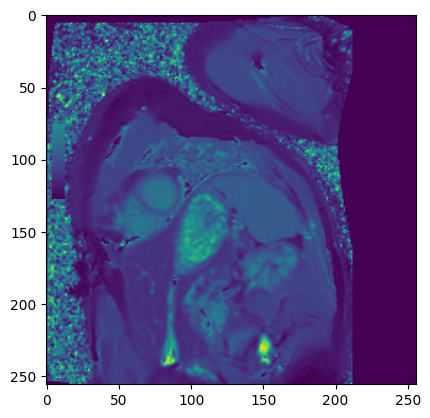

In [6]:
# show the first image
import matplotlib.pyplot as plt
plt.imshow(syn_images[0, 0, :, :])
print(syn_images[0, 0, :, :].min(), syn_images[0, 0, :, :].max())
print(real_images[0, 0, :, :].min(), real_images[0, 0, :, :].max())

In [7]:
# convert image to 12 bit
syn_images = syn_images * 4095
real_images = real_images * 4095

# convert to numpy
syn_images = syn_images.numpy().astype('uint16')
real_images = real_images.numpy().astype('uint16')

In [22]:
print(real_images[0,0,:,:])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
print(syn_images[0, 0, :, :])

[[6 0 1 ... 1 2 1]
 [0 2 0 ... 3 2 1]
 [0 9 0 ... 0 0 2]
 ...
 [2 1 1 ... 1 2 1]
 [0 2 1 ... 2 1 2]
 [6 1 2 ... 2 0 1]]


In [8]:
# get the rows and columns from the first real image where it is not zero
rows, cols = np.where(real_images[0, 0, :, :] != 0)
print(len(np.unique(rows)))
print(len(np.unique(cols)))

# print min max of rwo and col
print(rows.min(), rows.max())
print(cols.min(), cols.max())

190
167
2 191
1 167


In [11]:
# crop the images
#syn_images = syn_images[0, 0, rows.min():rows.max(), cols.min():cols.max()]

TypeError: Invalid shape (930, 3, 256, 256) for image data

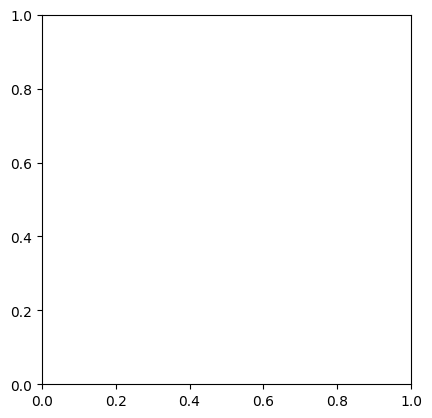

In [12]:
# show the first image
plt.imshow(syn_images)

In [25]:
print(syn_images.shape)

(930, 3, 256, 256)


In [8]:
#image2d = image2d.astype(np.uint16)
def save_2_dcm(image2d, filename):

    print("Setting file meta information...")
    # Populate required values for file meta information
    ds = pydicom.dcmread("Apex.dcm")

    
    meta = pydicom.Dataset()
    meta.MediaStorageSOPClassUID = pydicom._storage_sopclass_uids.MRImageStorage
    meta.MediaStorageSOPInstanceUID = pydicom.uid.generate_uid()
    meta.TransferSyntaxUID = pydicom.uid.ExplicitVRLittleEndian  
    
    #ds = Dataset()
    ds.file_meta = meta
    '''
    ds.is_little_endian = True
    ds.is_implicit_VR = False

    ds.SOPClassUID = pydicom._storage_sopclass_uids.MRImageStorage
    ds.PatientName = "Test^Firstname"
    ds.PatientID = "123456"

    ds.Modality = "MR"
    ds.SeriesInstanceUID = pydicom.uid.generate_uid()
    ds.StudyInstanceUID = pydicom.uid.generate_uid()
    ds.FrameOfReferenceUID = pydicom.uid.generate_uid()

    ds.BitsStored = 16
    ds.BitsAllocated = 16
    ds.SamplesPerPixel = 1
    ds.HighBit = 15

    ds.ImagesInAcquisition = "1"

    ds.Rows = image2d.shape[0]
    ds.Columns = image2d.shape[1]
    ds.InstanceNumber = 1

    ds.ImagePositionPatient = r"0\0\1"
    ds.ImageOrientationPatient = r"1\0\0\0\-1\0"
    ds.ImageType = r"ORIGINAL\PRIMARY\AXIAL"

    ds.RescaleIntercept = "0"
    ds.RescaleSlope = "1"
    ds.PixelSpacing = r"1\1"
    ds.PhotometricInterpretation = "MONOCHROME2"
    ds.PixelRepresentation = 1
    '''
    ds.Rows = image2d.shape[0]
    ds.Columns = image2d.shape[1]
    pydicom.dataset.validate_file_meta(ds.file_meta, enforce_standard=True)

    print("Setting pixel data...")
    ds.PixelData = image2d.tobytes()
    
    ds.save_as(filename + ".dcm", write_like_original=False)

In [9]:
for i in range(len(syn_images)):
    if i == 1270:
        break
    # crop the image
    syn_image = syn_images[i, 0, 0:sizes[i][0], 0:sizes[i][1]]
    save_2_dcm(syn_image, f'/mnt/d/projects/cardiac_gan/results/2024-06-08_21-15-55/syn/2024-06-08_21-15-55/dcm_files/syn_{i:04d}')
    


Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting file meta information...
Setting pixel data...
Setting fi

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.12302593503398867646272276092571447481
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.4.2'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0060) Modality                            CS: 'MR'
(0010, 0010) Patient's Name                      PN: 'Test^Firstname'
(0010, 0020) Patient ID                          LO: '123456'
(0020, 000d) St

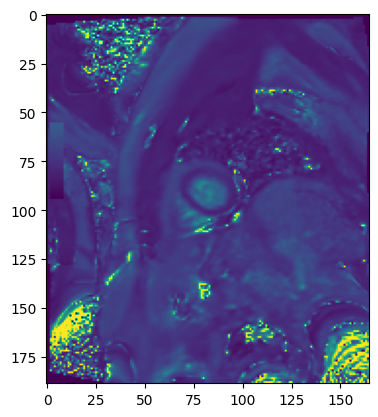

In [62]:
# read and check the dicom file
ds = pydicom.dcmread("out.dcm")
print(ds)
# get the dataset

# get the pixel data
image2d = ds.pixel_array
plt.imshow(image2d)
plt.show()

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.18.142101.2019072415194747766006694
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.4.2'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'T1 MAP', 'MOCO', 'T1', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '20190724'
(0008, 0013) Instance Creation Time              TM: '151947.851000'
(0008, 0016) SOP Class UID                       UI: MR Image St

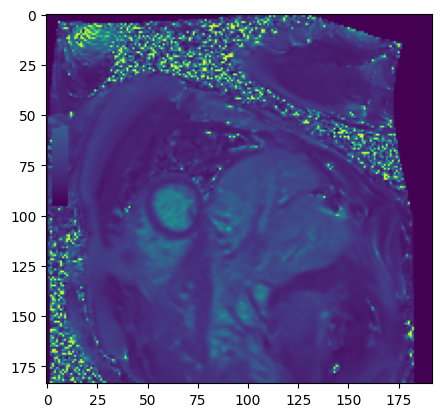

In [28]:
# read and check the dicom file
ds = pydicom.dcmread("/mnt/d/projects/cardiac_gan/results/2024-04-15_21-34-41_syn/dcm_files/syn_100.dcm")
print(ds)

# get the pixel data
image2d = ds.pixel_array
# get image size
print(image2d.shape)
plt.imshow(image2d)
plt.show()

In [6]:
TEST_PATIENTS = [7, 21, 30, 33, 34, 37, 41, 58, 86, 110, 123, 135, 145, 148, 155, 163, 164, 172, 177, 183, 190, 191, 207, 212, 220]
VAL_PATIENTS  = [3, 4, 12, 14, 19, 23, 28, 35, 40, 46, 50, 55, 98, 107, 130, 137, 156, 162, 176, 182, 185, 197, 209, 213, 219]

SYN_PATIENTS = [181, 186, 84, 1748, 1812, 1821, 62, 1665, 196, 1978, 95, 57, 1750, 1708, 1773, 1622, 153, 1575, 1629, 109, 99, 1830, 1833, 1601, 1737, 1984, 127, 1584, 1860, 47, 18, 1814, 111, 1805, 221, 1613, 1603, 1587, 65, 1585, 1661, 1900, 1621, 120, 1699, 1614, 1963, 1715, 1726, 165, 171, 119, 1938, 1691, 170, 60, 5, 202, 1924, 1880, 1962, 1712, 1572, 143, 1969, 1616, 1793, 93, 1632, 1914, 1850, 1672, 64, 1677, 1829, 1893, 1878, 1945, 1890, 1970, 1656, 24, 73, 192, 1756, 1867, 105, 1954, 1999, 9, 158, 1883, 124, 1692, 1711, 1927, 1671, 1820, 1961, 1733, 1780, 1611, 1943, 206, 203, 1940, 1932, 38, 63, 1740, 1992, 1874, 173, 1871, 1903, 1816, 61, 1591, 1991, 76, 1818, 1885, 1669, 13, 115, 1869, 1845, 201, 1828, 1875, 72, 194, 1879, 1610, 1837, 174, 1870, 1925, 1653, 1789, 1735, 141, 184, 1634, 1644, 1888, 1997, 1567, 53, 1785, 178, 1695, 1721, 1668, 1645, 1619, 1933, 1976, 1977, 79, 1929, 42, 1660, 118, 218, 1559, 161, 1864, 97, 1817, 166, 1889, 1823, 1971, 133, 1965, 1784, 1956, 1998, 1792, 1936, 51, 142, 179, 195, 1844, 136, 112, 1982, 52, 1895, 1898, 1836, 1771, 1946, 39, 1994, 15]
TRAIN_PATIENTS = [id for id in range(1, 222+1) if id not in TEST_PATIENTS and id not in VAL_PATIENTS and id not in SYN_PATIENTS]
INTEROBSERVER_PATIENTS = range(223, 262+1)

DIAG_SEG_23_08_TRAIN = [1584, 1731, 1712, 1639, 1714, 1625, 1758, 1612, 1661, 1700, 1668, 1788, 1784, 1793, 1649, 1735, 1654, 1603, 1671, 1613, 1657, 1568, 1705, 1642, 1767, 1794, 1771, 1592, 1707, 1647, 1804, 1739, 1650, 1799, 1640, 1748, 1616, 1696, 1627, 1695, 1681, 1609, 1738, 1744, 1672, 1809, 1567, 1734, 1798, 1750, 1772, 1646, 1608, 1765, 1723, 1756, 1593, 1641, 1716, 1770, 1620, 1599, 1789, 1774, 1753, 1763, 1591, 1638, 1601, 1619, 1733, 1644, 1787, 1699, 1722, 1812, 1569, 1571, 1682, 1736, 1785, 1648, 1690, 1803, 1651, 1791, 1691, 1576, 1718, 1615, 1807, 1623, 1725, 1667, 1602, 1761, 1796, 1617, 1587, 1800, 1562, 1678, 1780, 1776, 1610, 1680, 1595, 1709, 1762, 1683, 1577, 1582, 1653, 1792, 1583, 1692, 1754, 1730, 1594, 1811, 1775, 1559, 1560, 1614, 1656, 1708, 1808, 1740, 1563, 1726, 1635, 1677, 1564, 1636, 1589, 1628, 1729, 1660, 1757, 1766, 1674, 1605, 1606, 1783, 1732, 1751, 1578, 1622, 1694, 1795, 1659, 1728, 1769, 1773, 1720, 1581, 1621, 1645, 1721, 1611, 1643, 1713, 1777, 1597, 1669, 1565, 1684, 1666, 1598, 1588, 1633, 1790, 1737, 1686, 1711, 1604, 1685, 1801, 1629, 1632, 1760, 1806, 1586, 1805, 1558, 1585, 1746, 1580, 1575, 1786, 1600, 1752, 1572, 1781, 1665, 1634, 1715, 1673, 1573, 1579, 1693, 1701, 1618, 1727]
DIAG_SEG_23_08_VAL = [1652, 1561, 1719, 1557, 1566, 1658, 1630, 1698, 1688, 1675, 1687, 1706, 1607, 1782, 1574, 1702, 1747, 1717, 1743, 1810, 1778, 1697, 1664, 1745, 1663, 1689, 1703, 1704, 1802, 1624, 1797, 1590, 1631, 1779, 1768, 1676, 1596, 1742, 1570, 1655, 1759, 1741, 1662, 1749, 1724, 1637, 1626, 1755, 1764, 1710, 1670, 1679]

TRAIN_FROM_23 = [id for id in range(1813, 2000) if id not in SYN_PATIENTS]
TEST_FROM_23 = [id for id in range(2000, 2084+1)]


TRAIN_arr = TRAIN_PATIENTS + DIAG_SEG_23_08_TRAIN + TRAIN_FROM_23

In [7]:
print(TRAIN_arr)

[1, 2, 6, 8, 10, 11, 16, 17, 20, 22, 25, 26, 27, 29, 31, 32, 36, 43, 44, 45, 48, 49, 54, 56, 59, 66, 67, 68, 69, 70, 71, 74, 75, 77, 78, 80, 81, 82, 83, 85, 87, 88, 89, 90, 91, 92, 94, 96, 100, 101, 102, 103, 104, 106, 108, 113, 114, 116, 117, 121, 122, 125, 126, 128, 129, 131, 132, 134, 138, 139, 140, 144, 146, 147, 149, 150, 151, 152, 154, 157, 159, 160, 167, 168, 169, 175, 180, 187, 188, 189, 193, 198, 199, 200, 204, 205, 208, 210, 211, 214, 215, 216, 217, 222, 1584, 1731, 1712, 1639, 1714, 1625, 1758, 1612, 1661, 1700, 1668, 1788, 1784, 1793, 1649, 1735, 1654, 1603, 1671, 1613, 1657, 1568, 1705, 1642, 1767, 1794, 1771, 1592, 1707, 1647, 1804, 1739, 1650, 1799, 1640, 1748, 1616, 1696, 1627, 1695, 1681, 1609, 1738, 1744, 1672, 1809, 1567, 1734, 1798, 1750, 1772, 1646, 1608, 1765, 1723, 1756, 1593, 1641, 1716, 1770, 1620, 1599, 1789, 1774, 1753, 1763, 1591, 1638, 1601, 1619, 1733, 1644, 1787, 1699, 1722, 1812, 1569, 1571, 1682, 1736, 1785, 1648, 1690, 1803, 1651, 1791, 1691, 1576, 171

In [14]:
import numpy as np
# split the TRAIN_arr into train and val
np.random.seed(2)
np.random.shuffle(TRAIN_arr)
TRAIN = TRAIN_arr[:int(len(TRAIN_arr)*0.65)]
VAL = TRAIN_arr[int(len(TRAIN_arr)*0.65):]

In [15]:
print(TRAIN)
print(VAL)

[1862, 159, 1769, 1988, 44, 1715, 1964, 1805, 1660, 1595, 1752, 1718, 1973, 1910, 1757, 85, 1597, 81, 1861, 1989, 91, 1897, 1580, 1855, 1681, 187, 1937, 1696, 1787, 175, 1568, 10, 1774, 1921, 208, 1579, 1619, 151, 1642, 1716, 1692, 1572, 1819, 1562, 1602, 1886, 1628, 131, 1831, 1974, 1916, 36, 128, 1700, 114, 94, 1949, 1911, 146, 1693, 132, 1935, 1902, 1731, 1955, 1996, 1987, 1634, 1661, 1858, 1582, 1654, 1838, 1761, 22, 78, 1899, 43, 1571, 1852, 1866, 1771, 1738, 1604, 1751, 1795, 1673, 1684, 1707, 1913, 1668, 199, 1605, 1835, 1730, 1894, 1881, 1617, 216, 1986, 1957, 87, 1873, 1577, 1854, 1758, 1777, 1800, 11, 1896, 1773, 200, 1981, 1677, 80, 1952, 126, 1856, 1917, 193, 102, 1629, 1756, 1842, 1928, 1868, 1609, 168, 1979, 1615, 188, 1884, 1734, 1762, 1665, 1983, 1728, 16, 1578, 101, 1623, 1639, 1926, 106, 1744, 1729, 1813, 1939, 1723, 1733, 1941, 70, 1633, 1600, 56, 1783, 1841, 82, 1959, 1651, 1581, 1613, 1904, 1934, 210, 92, 1968, 1671, 1826, 45, 1598, 1906, 1573, 1735, 29, 1583, 1901

In [10]:
# read text file
with open('/mnt/d/projects/cardiac_gan/results/2024-06-08_21-15-55/syn/2024-06-08_21-15-55/mask_path_list.txt', 'r') as file:
    data = file.read().split('\n')

print(data)

# write the data into the file
with open('/mnt/d/projects/cardiac_gan/results/2024-06-08_21-15-55/syn/2024-06-08_21-15-55/mask_path_list_new.txt', 'w') as file:
    for line in data:
        # remove /data/se/ from the line
        #line = line.replace('/data/se/', '')
        line = line.replace('./se/', '')
        file.write(line + '\n')

['./se/2022_11_22/Patient (100)/T1_map_apex/Contours.json', './se/2022_11_22/Patient (100)/T1_map_mid_/Contours.json', './se/2022_11_22/Patient (100)/T1_map_base/Contours.json', './se/2022_11_22/Patient (100)/T2_map_apex/Contours.json', './se/2022_11_22/Patient (100)/T2_map_mid_/Contours.json', './se/2022_11_22/Patient (100)/T2_map_base/Contours.json', './se/2022_11_22/Patient (103)/T2_map_apex/Contours.json', './se/2022_11_22/Patient (103)/T2_map_mid_/Contours.json', './se/2022_11_22/Patient (103)/T2_map_base/Contours.json', './se/2022_11_22/Patient (105)/T1_map_apex/Contours.json', './se/2022_11_22/Patient (105)/T1_map_mid_/Contours.json', './se/2022_11_22/Patient (105)/T1_map_base/Contours.json', './se/2022_11_22/Patient (108)/T1_map_apex/Contours.json', './se/2022_11_22/Patient (108)/T1_map_mid_/Contours.json', './se/2022_11_22/Patient (108)/T1_map_base/Contours.json', './se/2022_11_22/Patient (108)/T2_map_apex/Contours.json', './se/2022_11_22/Patient (108)/T2_map_mid_/Contours.jso